# Preparing and exploring iMAT transcriptomic integrated metabolic modeling datasets.

#### Downloading in data

In [12]:
import pandas as pd
df_dict = {}
for i in range(1,13):
    df_dict[f"integrated_df_{i}"] = pd.read_csv(f"https://raw.githubusercontent.com/JackWJW/LGG_Prognosis_Prediction/main/iMAT_integrated_data/TCGA_iMAT_integrated_df_{i}.csv").set_index('sample')

Tidying data

In [ ]:
cols_of_interest = ["DSS","DSS.time", 
                    'A4GALT','ABO','B3GALNT1','B3GALT1','B3GALT4','B3GALT5','B3GNT2','B3GNT3','B3GNT5',
                    'B4GALNT1','B4GALT5','B4GALT6','FUT1','FUT2','FUT3','FUT5','FUT6','FUT9','GAL3ST1',
                    'GCNT2','ST3GAL1','ST3GAL2','ST3GAL3','ST3GAL4','ST3GAL5','ST3GAL6','ST6GALNAC2',
                    'ST6GALNAC3','ST6GALNAC4','ST6GALNAC5','ST6GALNAC6','ST8SIA1','ST8SIA5','UGCG','UGT8',
                    'D-galactosyl-N-acylsphingosine','GA1','GA2','GD1a','GD1b','GD1c','GD2','GD3','GM1',
                    'GM1b','GM2','GM3','GQ1b','GQ1c','GT1a','GT1b','GT1c','GT2','GT3','fucosyl-galactosylgloboside',
                    'galactosylgloboside','globoside','globotriaosylceramide','lactoneotetraosylceramide','lc3Cer','lc4Cer',
                    'sialyl-3-paragloboside','sialyl-galactosylgloboside','sulfatide galactocerebroside','type I H glycolipid','type II H glycolipid',
                    '(neo)lacto-series','0-series(ganglio)','a-series(ganglio)','b-series(ganglio)','c-series(ganglio)','gal-series','globo-series']

tidied_dict = {}
n=0
for key, df in df_dict.items():
    n += 1
    df = df.dropna()
    tidied_dict[key] = df

KeyError: 'primary disease or tissue'

Generating an averaged simulation dataframe

In [13]:
lipid_cols = ['D-galactosyl-N-acylsphingosine','GA1','GA2','GD1a','GD1b','GD1c','GD2','GD3','GM1',
                'GM1b','GM2','GM3','GQ1b','GQ1c','GT1a','GT1b','GT1c','GT2','GT3','fucosyl-galactosylgloboside',
                'galactosylgloboside','globoside','globotriaosylceramide','lactoneotetraosylceramide','lc3Cer','lc4Cer',
                'sialyl-3-paragloboside','sialyl-galactosylgloboside','sulfatide galactocerebroside','type I H glycolipid','type II H glycolipid',
                '(neo)lacto-series','0-series(ganglio)','a-series(ganglio)','b-series(ganglio)','c-series(ganglio)','gal-series','globo-series']

dataframe_list = list(df_dict.values())

for lipid in lipid_cols:
    lcs = []
    for x in range(1,12):
        lcs.append(f"{lipid}_{x}")

Renaming DSS in each dataframe

In [14]:
import numpy as np
gene_list = ['A4GALT','ABO','B3GALNT1','B3GALT1','B3GALT4','B3GALT5','B3GNT2','B3GNT3','B3GNT5',
                    'B4GALNT1','B4GALT5','B4GALT6','FUT1','FUT2','FUT3','FUT5','FUT6','FUT9','GAL3ST1',
                    'GCNT2','ST3GAL1','ST3GAL2','ST3GAL3','ST3GAL4','ST3GAL5','ST3GAL6','ST6GALNAC2',
                    'ST6GALNAC3','ST6GALNAC4','ST6GALNAC5','ST6GALNAC6','ST8SIA1','ST8SIA5','UGCG','UGT8']

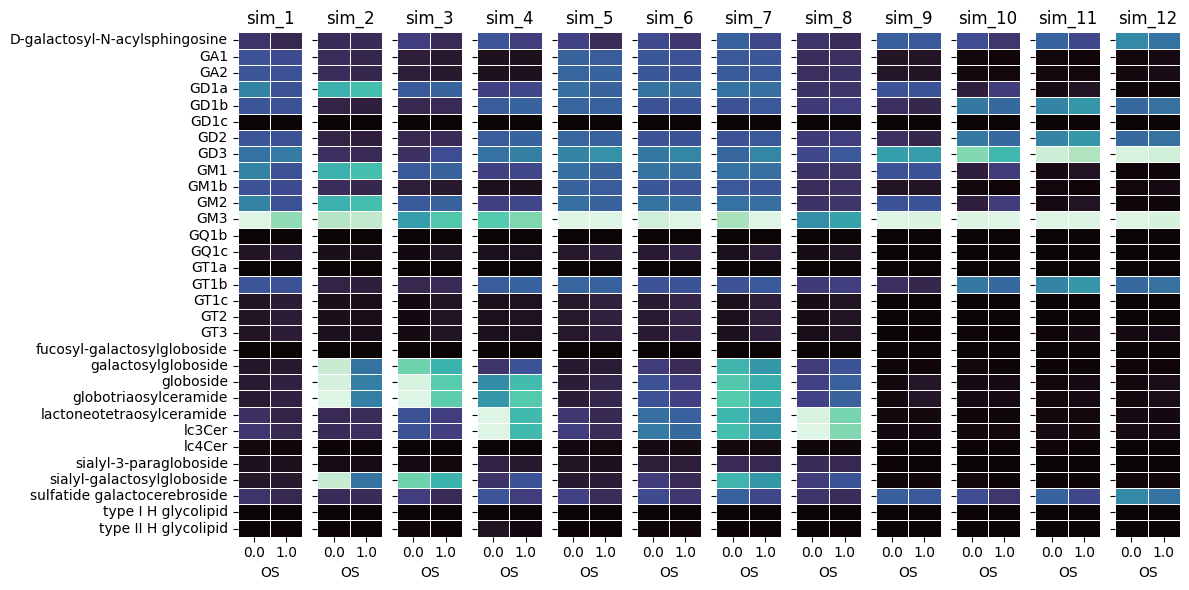

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plotting_dict = {}
for keys, df in df_dict.items():
    for gene in gene_list:
        drop_col = df.columns[df.columns.str.contains(gene)]
        df = df.drop(columns=drop_col)
    drop_col_2 = df.columns[df.columns.str.contains("series")]
    df = df.drop(columns=drop_col_2)
    df = df.drop(columns=['OS.time'])
    plotting_dict[keys] = df

num_dfs = len(plotting_dict)
fig, axes = plt.subplots(nrows=1, ncols=num_dfs, figsize=(1 * num_dfs, 6), squeeze=False) 

name_list = ["sim_1","sim_2","sim_3","sim_4","sim_5","sim_6","sim_7","sim_8","sim_9","sim_10","sim_11","sim_12","sim_13","sim_14","sim_15","sim_16","m_sim"]

for i, (name, df) in enumerate(plotting_dict.items()):
    ax = axes[0, i]
    sns.heatmap(df.groupby("OS").mean().T, cmap='mako', ax=ax, cbar=False,linewidth=0.5)
    ax.set_title(name_list[i])
    ax.set_ylabel("") 
    if i > 0:
        ax.set_yticklabels([])

plt.tight_layout()
plt.show()

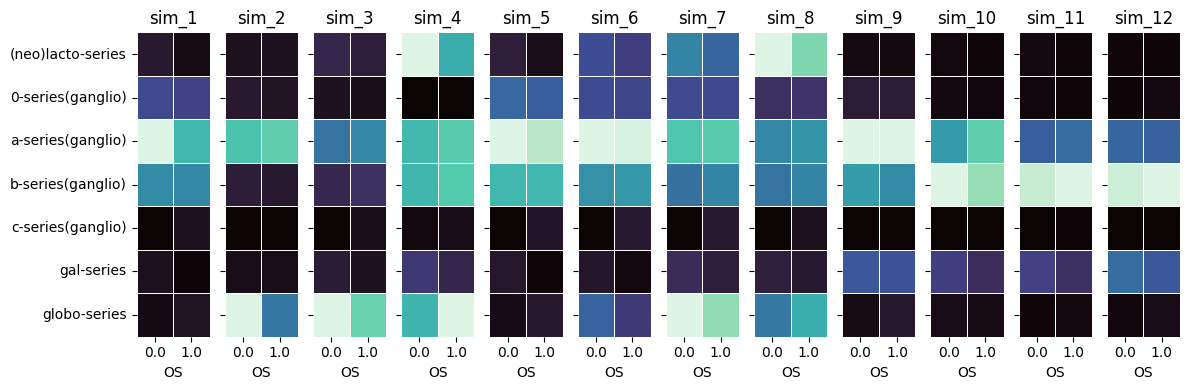

In [18]:
plotting_2_dict = {}
for keys, df in df_dict.items():
    for gene in gene_list:
        drop_col = df.columns[df.columns.str.contains(gene)]
        df = df.drop(columns=drop_col)
    df = df.drop(columns=['OS.time'])
    df = df.filter(regex='series|OS')
    plotting_2_dict[keys] = df

num_dfs = len(plotting_2_dict)
fig, axes = plt.subplots(nrows=1, ncols=num_dfs, figsize=(1 * num_dfs, 4), squeeze=False)


name_list = ["sim_1","sim_2","sim_3","sim_4","sim_5","sim_6","sim_7","sim_8","sim_9","sim_10","sim_11","sim_12","sim_13","sim_14","sim_15","sim_16","m_sim"]

for i, (name, df) in enumerate(plotting_2_dict.items()):
    ax = axes[0, i]
    sns.heatmap(df.groupby("OS").mean().T, cmap='mako', ax=ax, cbar=False,linewidth=0.5)
    ax.set_title(name_list[i])  
    ax.set_ylabel("")
    if i > 0:
        ax.set_yticklabels([]) 

plt.tight_layout()
plt.show()

In [19]:
grouped_dict = {}
i=0
for keys, df in df_dict.items():
    i += 1
    for gene in gene_list:
        drop_col = df.columns[df.columns.str.contains(gene)]
        df = df.drop(columns=drop_col)
    drop_col_2 = df.columns[df.columns.str.contains("series")]
    df = df.drop(columns=drop_col_2)
    drop_col_3 = df.columns[df.columns.str.contains("OS")]
    df = df.drop(columns=drop_col_3)
    df["Simulation"] = i
    grouped_dict[keys] = df

sims_lipid_df = pd.concat(grouped_dict.values(),axis=0)

In [20]:
grouped_dict_2 = {}
i=0
for keys, df in df_dict.items():
    i += 1
    df = df.filter(regex='series').copy()
    df["Simulation"] = i
    grouped_dict_2[keys] = df

sims_series_df = pd.concat(grouped_dict_2.values(),axis=0)

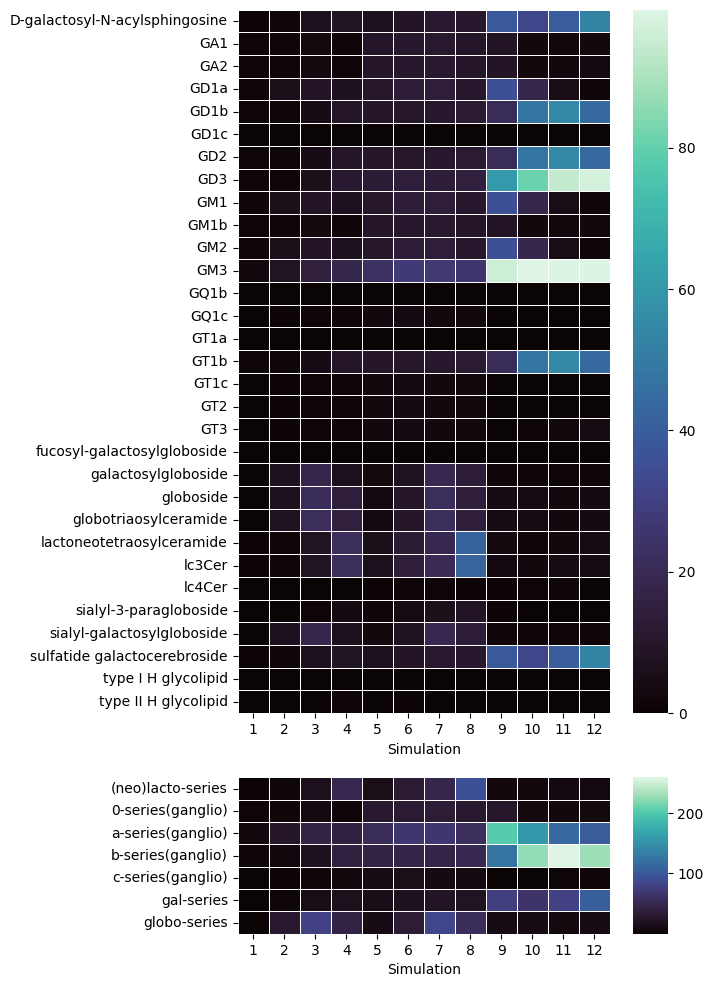

In [21]:
from matplotlib import gridspec
fig = plt.figure(figsize=(6,12))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         hspace=0.15, height_ratios=[4.5, 1])
ax0 = fig.add_subplot(spec[0])
sns.heatmap(sims_lipid_df.groupby("Simulation").mean().T,cmap='mako',linewidth=0.5,ax=ax0)
ax1 = fig.add_subplot(spec[1])
sns.heatmap(sims_series_df.groupby("Simulation").mean().T,cmap='mako',linewidth=0.5,ax=ax1,cbar_kws={"aspect":4.5})

plt.show()

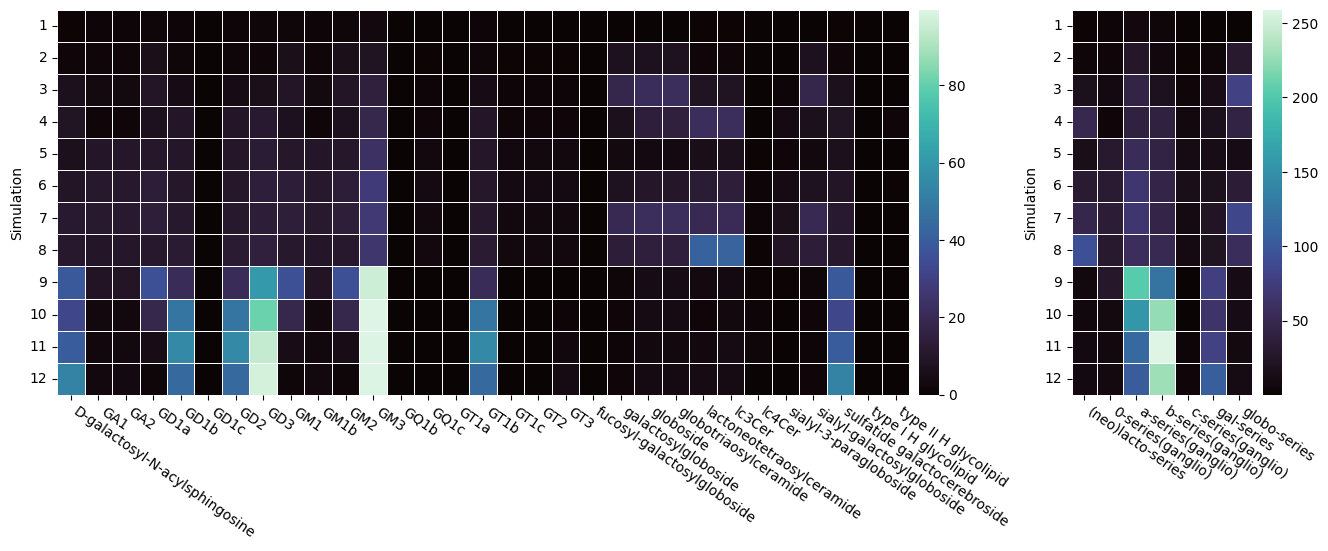

In [22]:
from matplotlib import gridspec
fig = plt.figure(figsize=(16,5))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         wspace=0, width_ratios=[4.5, 1])
ax0 = fig.add_subplot(spec[0])
sns.heatmap(sims_lipid_df.groupby("Simulation").mean(),cmap='mako',linewidth=0.5,ax=ax0,cbar_kws={"pad": 0.01})
plt.yticks(rotation=0)
plt.xticks(rotation=-35,ha='left')
ax1 = fig.add_subplot(spec[1])
sns.heatmap(sims_series_df.groupby("Simulation").mean(),cmap='mako',linewidth=0.5,ax=ax1,cbar_kws={"pad": 0.05})
plt.yticks(rotation=0)
plt.xticks(rotation=-35,ha='left')
plt.show()